#**What We Watched: A Netflix Engagement Report**








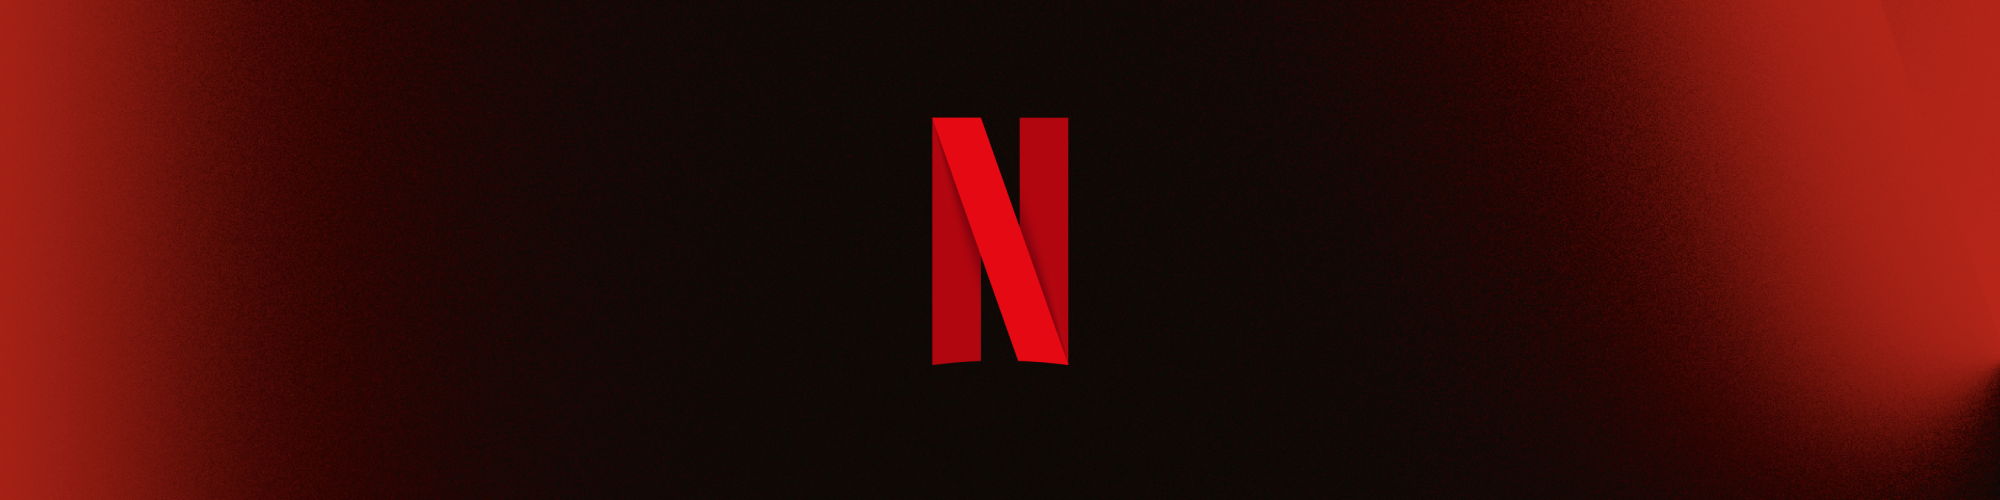

# **Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

# **About Netflix & Dataset**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Dataset**

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:



*   **Show_id:** Unique ID for every Movie / Tv Show
*   **Type:** Identifier - A Movie or TV Show
*   **Title:** Title of the Movie / Tv Show
*   **Director:** Director of the Movie
*   **Cast:** Actors involved in the movie/show
*   **Country:** Country where the movie/show was produced
*   **Date_added:** Date it was added on Netflix
*   **Release_year:** Actual Release year of the movie/show
*   **Rating:** TV Rating of the movie/show
*   **Duration:** Total Duration - in minutes or number of seasons
*   **Listed_in:** Genre
*   **Description:** The summary description


# **Project Goals:**


*  Perform exploratory data analysis on Netflix dataset to uncover content trends and preferences.

*   Identify growth opportunities for Netflix. Derive actionable insights to inform content strategy and business growth.







##Import necessary libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset


In [92]:
df = pd.read_csv('Netflix_Dataset.csv')

In [93]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Concise Summary

In [94]:
#dataframe is 2D

df.ndim

2

In [95]:
df.shape

(8807, 12)

In [96]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [97]:
# number of unique values in collumn
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

## Descriptive Statistics

In [98]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [99]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## **Basic Analysis**

In [100]:
# Checking for missing values in the dataset
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [101]:
# checking for empty values within the dataframe

df.empty

False

# **Duplicates**

In [102]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [103]:
# Categorical unique value check, numerical parameters overview
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Release Year: The data spans from 1925 to 2021, with an average release year of 2014.

- Country Distribution: The majority of shows and movies come from the United States.

- Content Types: There are more movies than TV shows in the dataset.

In [104]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


**Observation:** 3 duration values are missing and were incorrectly placed in the rating column.

In [105]:
# Swap values between 'rating' and 'duration' for rows with missing 'duration'
for index in df[df['duration'].isna()].index:
    temp = df.loc[index, 'rating']
    df.loc[index, 'rating'] = df.loc[index, 'duration']
    df.loc[index, 'duration'] = temp

# Verify the changes
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [106]:
df[df.rating.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


## Handling Missing Values

In [107]:
df['rating'] = df['rating'].replace(np.nan, 'Not Available')
df[df.rating == 'Not Available']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [108]:
# checking the unique values in rating column as it has only 17 unique values

df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [109]:
# In rating column , NR (Not rated) is same as UR (Unrated). lets change UR to NR.

df.loc[df['rating'] == 'UR' , 'rating'] = 'NR'
df.rating.value_counts()

rating
TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 83
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
Name: count, dtype: int64

In [110]:
# Removing the null values from the ‘date_added’ column.
df.drop(df.loc[df['date_added'].isna()].index , axis = 0 , inplace = True)
df['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [111]:
# Given that all values in the ‘date_added’ column adhere to the date format,
# convert its data type from ‘object’ to ‘datetime’.
# First strip any leading/trailing whitespaces that may be present in date strings
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

In [112]:
# You can create the new columns ‘year_added’ and ‘month_added’ by extracting the year and month from the ‘date_added’ column, respectively
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [113]:
# the percentage of missing values in each column
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.828351
cast             9.378197
country          9.435035
date_added       0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
dtype: float64

After data cleaning, there are still null values in three columns:

1.   Country: Missing in approximately **9%** of the content.
2.   Director Names: Missing in around **30%** of the content.
3.   Cast: Missing in approximately **9%** of the content.

To handle these categorical variables missing values, you can update the corresponding rows with a placeholder value such as **“unknown_column_name.”**

In [114]:
# Replace missing values in 'country', 'director', and 'cast' columns with "unknown"
df['country'] = df['country'].fillna('unknown_Country')
df['director'] = df['director'].fillna('unknown_Director')
df['cast'] = df['cast'].fillna('unknown_Cast')

#Check for null values again to confirm the changes
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

In [115]:
def unnest_dataframe(df, column):
        return (df.drop(column, axis=1).join(df[column].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename(column)))

unnested_cast = unnest_dataframe(df.copy(), 'cast')
unnested_title = unnest_dataframe(df.copy(), 'title')
unnested_country = unnest_dataframe(df.copy(), 'country')
unnested_listed_in = unnest_dataframe(df.copy(), 'listed_in')
unnested_director = unnest_dataframe(df.copy(), 'director')

## **1. Find the counts of each categorical variable both using graphical and nongraphical analysis.**



**A.** For Non-graphical Analysis:  



In [116]:
#a) Non-graphical analysis: Value counts for each categorical variable
# Define the categorical columns
categorical_columns = ['director','type','country','listed_in', 'release_year', 'date_added','cast','rating', 'duration']
# Calculate value counts for each column
value_counts = {column: df[column].value_counts() for column in categorical_columns}

# Print the results
for column, counts in value_counts.items():
    print(f"{column} value counts:\n{counts}\n")


director value counts:
director
unknown_Director                  2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

type value counts:
type
Movie      6131
TV Show    2666
Name: count, dtype: int64

country value counts:
country
United States                             2812
India                                      972
unknown_Country                            830
United Kingdom                             418
Japan                                      244
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, S

**B.** Graphical analysis

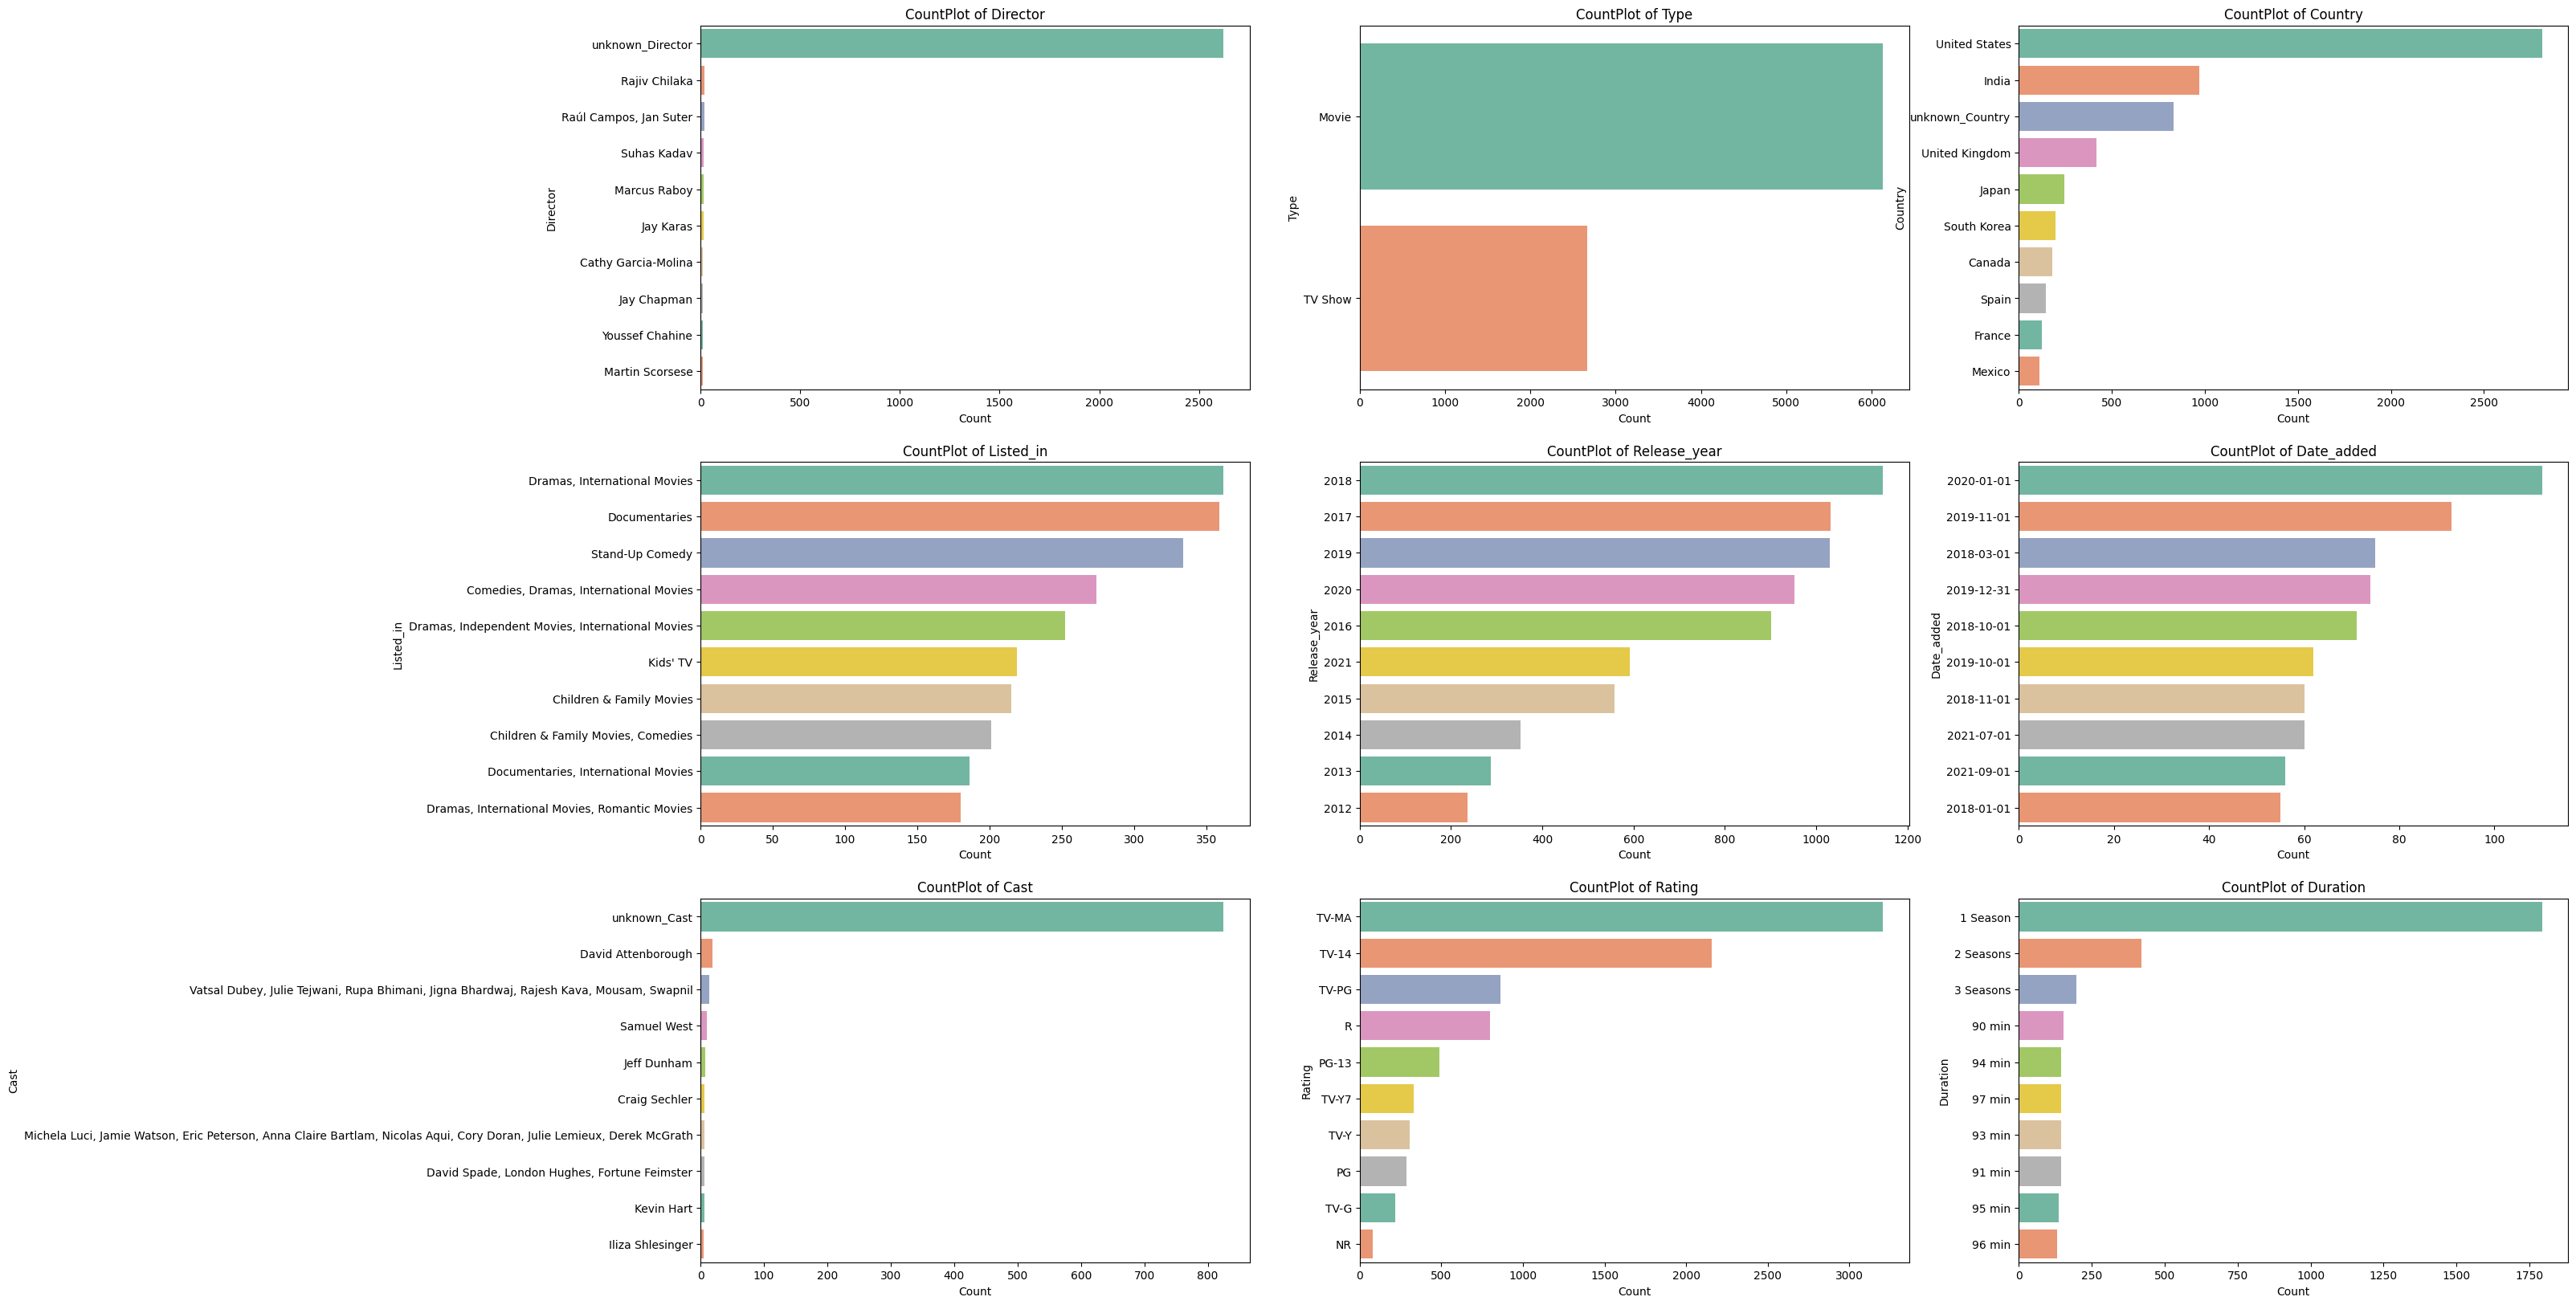

In [117]:
# b) Graphical analysis: Countplots for each categorical variable
custom_palette = sns.color_palette("Set2")
fig,axes =plt.subplots(3, 3,figsize=(30, 20))
axes= axes.flatten()
for i, column in enumerate(categorical_columns):
  order =df[column].value_counts().index[:10]
  sns.countplot(y=df[column],order=order,ax=axes[i], palette=custom_palette)
  axes[i].set_title(f'CountPlot of {column.capitalize()}')
  axes[i].set_xlabel('Count')
  axes[i].set_ylabel(column.capitalize())
  axes[i].tick_params(axis='y',labelsize=10)
  axes[i].tick_params(axis='x',labelsize=10)

plt.show()

---
**Insights:**

1. **Director Information:**
   - The majority of entries (2624 out of 4529) have an "Unknown Director." This indicates a gap in metadata collection. Improving data quality by identifying directors for more entries would enhance content transparency.

2. **Content Types (Movies vs. TV Shows):**
   - The dataset contains 6131 movies and 2666 TV shows. Netflix's catalog is movie-dominant, catering to a wide range of movie enthusiasts.

3. **Content Production Countries:**
   - The United States (2812 entries) dominates the dataset, followed by India (972 entries). Netflix should consider diversifying its content by including more international productions.

4. **Content Categories (Listed In):**
   - The most common categories are "Dramas, International Movies," "Documentaries," and "Stand-Up Comedy." Netflix can continue to invest in these popular genres while exploring niche categories.

5. **Release Years:**
   - Recent years (2018, 2017, 2019, and 2020) have the highest content releases. Netflix's focus on fresh content aligns with viewer preferences.

6. **Date Added:**
   - January 1, 2020, has the highest number of additions (110 entries). Netflix should maintain a consistent release schedule to keep viewers engaged.
7. Common Content Ratings:
   - TV-MA and TV-14 are prevalent content ratings. Netflix caters to mature audiences, exploring diverse themes. Balancing with family-friendly options could enhance appeal.

---

**Recommendations:**

1. **Enhance Director Metadata:**
   - Invest in accurate director information for entries labeled as "Unknown Director." Transparency about creative contributors enhances user trust.

2. **Balance Content Types:**
   - While movies are popular, consider promoting engaging TV shows to diversify the catalog. Cater to varied viewer preferences.

3. **Global Content Strategy:**
   - Expand international content offerings beyond the U.S. Include diverse productions from different countries and cultures.

4. **Genre Exploration:**
   - Continue investing in popular genres (e.g., dramas, documentaries, and stand-up comedy). Simultaneously, explore niche genres to attract a broader audience.

5. **Strategic Release Timing:**
   - Maintain a consistent release schedule throughout the year. Highlight major additions to keep subscribers engaged.

6. **Age-Targeted Content:**
   - Develop content for different age groups. Consider family-friendly shows alongside mature themes to widen the audience.

---

# **2. Comparison of Tv Shows vs Movies.**


In [118]:
#Number of Unique Movies and TV Shows
unique_tv_shows = df[df['type'] == 'TV Show']['show_id'].nunique()
unique_movies = df[df['type'] == 'Movie']['show_id'].nunique()
unique_tv_shows, unique_movies

(2666, 6131)

**A.** Find the number of movies produced in each country and pick the top 10 countries.

In [119]:
df_cleaned = df[df['country']!= 'unknown_Country']
# Filter the DataFrame to consider only movies
count_of_movies = df_cleaned.query('type == "Movie"')

# Group by country and count the number of unique movie titles
count_of_movies = count_of_movies.groupby('country')['title'].nunique()

# Take the top 10 countries with the highest movie counts
top_countries_movies = count_of_movies.sort_values(ascending=False).head(10)

print("Top 10 countries with the highest movies counts")
top_countries_movies

Top 10 countries with the highest movies counts


country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64

**B.** Find the number of Tv-Shows produced in each country and pick the top 10
 countries.





In [120]:
df_cleaned = df[df['country']!= 'unknown_Country']
# Filter the DataFrame to consider only TV Shows
count_of_tvshows = df_cleaned.query('type == "TV Show"')

# Group by country and count the number of unique movie titles and name that column count
tvshows_counts_by_country = count_of_tvshows.groupby('country')['title'].nunique()

# Take the top 10 countries with the highest tvshows counts
top_countries_tvshows = tvshows_counts_by_country.sort_values(ascending=False).head(10)

print("Top 10 countries with the highest TV Shows counts")
print(top_countries_tvshows)

Top 10 countries with the highest TV Shows counts
country
United States     754
United Kingdom    212
Japan             168
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          47
Name: title, dtype: int64


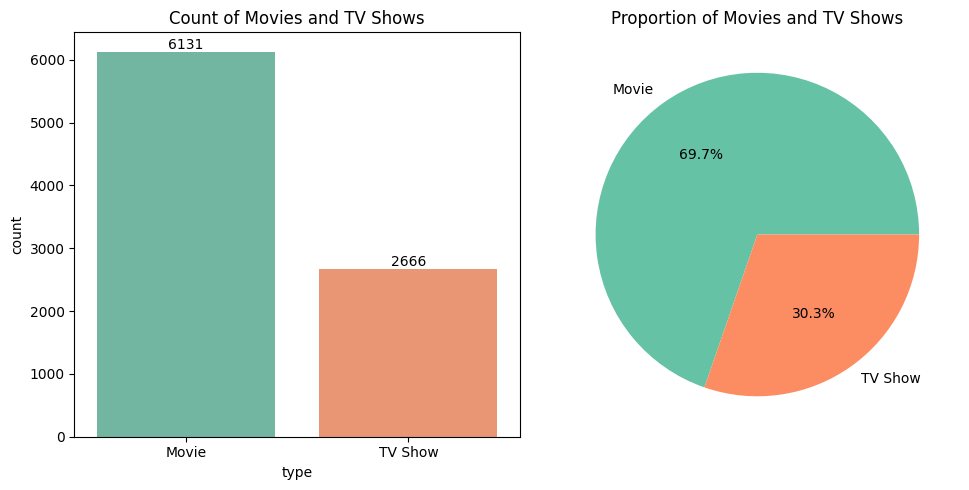

In [121]:
#Count of total movies and Tv shows
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Countplot
sns.countplot(data=df, x='type', palette=custom_palette, ax=axes[0])
axes[0].set_title('Count of Movies and TV Shows')

# Add integer values inside the bars
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha="center", va="bottom")


# Pie chart
axes[1].pie(df['type'].value_counts(), labels=df['type'].value_counts().index,
            autopct='%1.1f%%', colors=custom_palette)
axes[1].set_title('Proportion of Movies and TV Shows')

plt.tight_layout()
plt.show()

---
**Insights**:

1. **TV Show and Movies Distribution by Country:**
   - The analysis highlights the distribution of TV shows and movies across different countries.

2. **Top Countries with Highest TV Show and Movies Counts:**
   - The United States, India, and the United Kingdom lead in Netflix movie production.
   - For TV shows, the top three producers are the US, UK, and Japan.
   - India produces fewer TV shows compared to movies.

3. **Content Localization:**
   - Given the high TV show and movie counts in certain countries, explore opportunities for content localization.
   - Consider creating region-specific content or adapting existing shows to cater to audience preferences in these top countries.

4. **Collaborations and Partnerships:**
   - Strengthen relationships within the industry by collaborating with content creators, production houses, and talent from the top countries.
   - Such partnerships can lead to more diverse and engaging TV shows and movies.

5. **Genre Preferences:**
   - Analyze genre preferences in these top countries.
   - Tailor content recommendations and new releases to align with the most popular genres in each region.
   
---

**Recommendations**:

1. **Localized Content:**
   - Develop content that resonates with local audiences.
   - Consider cultural nuances, language, and regional interests when creating TV shows and movies.

2. **Cross-Country Collaborations:**
   - Foster collaborations between filmmakers, writers, and actors from different countries.
   - Joint productions can bring fresh perspectives and widen the audience base.

3. **Genre-Specific Strategies:**
   - Customize marketing and distribution strategies based on genre preferences.
   - Promote relevant content to specific regions to maximize viewership.

Remember, understanding viewer preferences and adapting content accordingly is crucial for success in the competitive streaming industry.

---




# **3. What is the best time to launch a TV show?**

**A.** Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [122]:
# Extract week of the year from 'date_added'
df['week_added'] = df['date_added'].dt.isocalendar().week

# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']

# Analyze best week for movies
best_week_movies = movies_df['week_added'].value_counts().idxmax()
print(f"Best week to release a Movie: Week {best_week_movies}")

# Analyze best week for TV shows
best_week_tvshows = tvshows_df['week_added'].value_counts().idxmax()
print(f"Best week to release a TV show: Week {best_week_tvshows}")


Best week to release a Movie: Week 1
Best week to release a TV show: Week 27


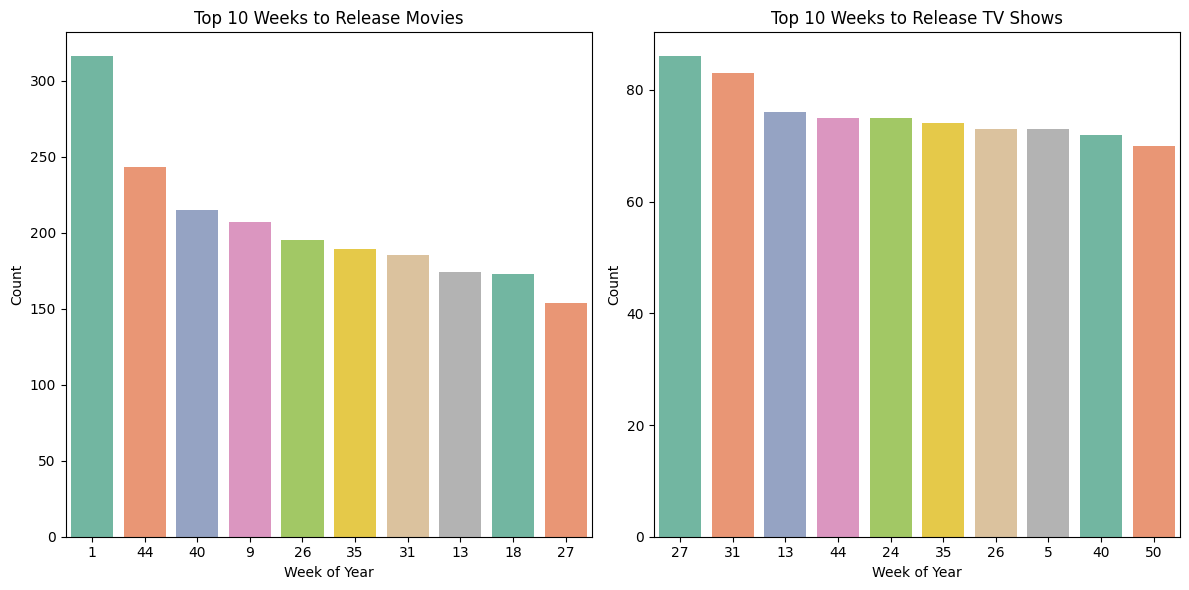

In [123]:
# prompt: plot a count plot graph for  side by side  for Best Week to release the Movies and Best Week to release the Tv-Show and make it top 10 week and order it by desending

import matplotlib.pyplot as plt
# Calculate the top 10 weeks for movies and TV shows
top10_weeks_movies = movies_df['week_added'].value_counts().nlargest(10).index
top10_weeks_tvshows = tvshows_df['week_added'].value_counts().nlargest(10).index

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for movies
sns.countplot(data=movies_df[movies_df['week_added'].isin(top10_weeks_movies)],
              x='week_added', order=top10_weeks_movies, palette=custom_palette, ax=axes[0])
axes[0].set_title('Top 10 Weeks to Release Movies')
axes[0].set_xlabel('Week of Year')
axes[0].set_ylabel('Count')

# Plot for TV shows
sns.countplot(data=tvshows_df[tvshows_df['week_added'].isin(top10_weeks_tvshows)],
              x='week_added', order=top10_weeks_tvshows, palette=custom_palette, ax=axes[1])
axes[1].set_title('Top 10 Weeks to Release TV Shows')
axes[1].set_xlabel('Week of Year')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


**B.** Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [124]:
# Extract month from 'date_added'
df['month_added'] = df['date_added'].dt.month

# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']

# Analyze best month for movies
best_month_movies = movies_df['month_added'].value_counts().idxmax()
print(f"Best month to release a Movie: Month {best_month_movies}")

# Analyze best month for TV shows
best_month_tvshows = tvshows_df['month_added'].value_counts().idxmax()
print(f"Best month to release a TV show: Month {best_month_tvshows}")

Best month to release a Movie: Month 7
Best month to release a TV show: Month 12


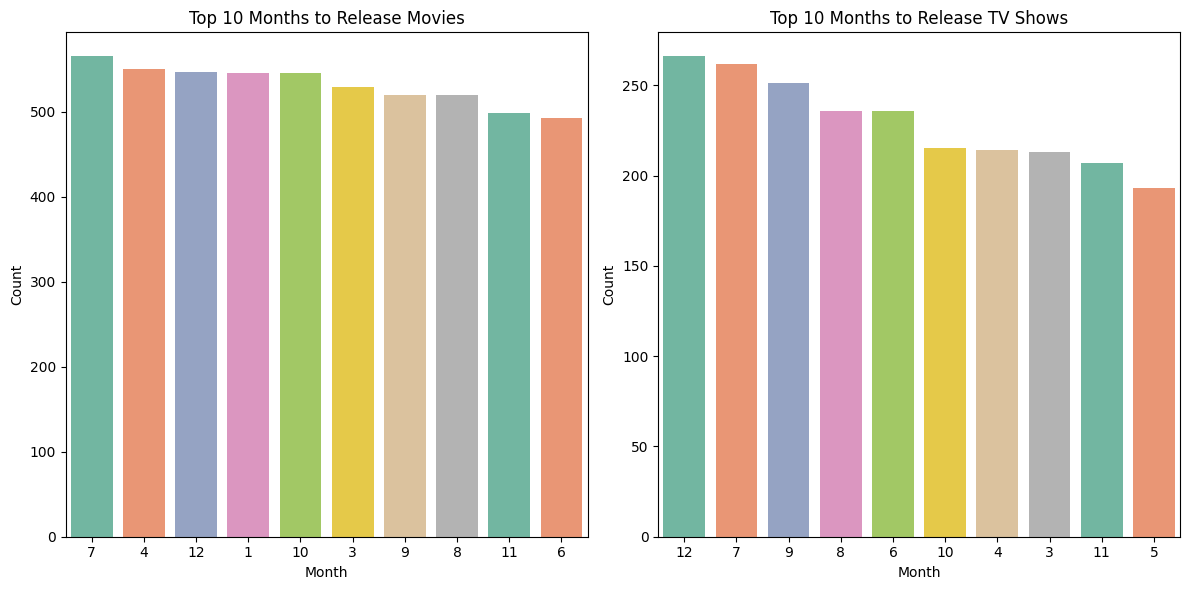

In [125]:
# Calculate the top 10 months for movies and TV shows
top10_months_movies = movies_df['month_added'].value_counts().nlargest(10).index
top10_months_tvshows = tvshows_df['month_added'].value_counts().nlargest(10).index

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for movies
sns.countplot(data=movies_df[movies_df['month_added'].isin(top10_months_movies)],
              x='month_added', order=top10_months_movies, palette=custom_palette, ax=axes[0])
axes[0].set_title('Top 10 Months to Release Movies')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

# Plot for TV shows
sns.countplot(data=tvshows_df[tvshows_df['month_added'].isin(top10_months_tvshows)],
              x='month_added', order=top10_months_tvshows, palette=custom_palette, ax=axes[1])
axes[1].set_title('Top 10 Months to Release TV Shows')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

---
## Insights:

1. **Seasonal Distribution of Releases:**
   - Peaks in the graphs indicate popular times for launching new content.
   - Understanding these patterns helps optimize release schedules.

2. **Optimal Timing for TV Shows:**
   - Week 27 (around July) is ideal for TV show launches.
   - December also stands out as a favorable period.

3. **Optimal Timing for Movies:**
   - Week 1 (early January) and July are best for movie releases.
   - Notable movie peaks occur in July, early October, late February to early March, late June to early July, and late August to early September.
---
## Recommendations:

1. **Strategic Content Release:**
   - Plan releases based on peak months.
   - Align TV shows and movies with audience preferences during these times.

2. **Promotions and Marketing:**
   - Boost visibility during peak months.
   - Collaborate with influencers or run special campaigns.

3. **Diversify Content Types:**
   - Analyze genre performance by month.
   - Offer diverse content to cater to changing preferences.

4. **Optimal Release Day:**
   - Choose the best day for impact.
   - Maximize viewership on popular release days.

5. **Viewer Engagement Strategies:**
   - Use interactive features, social media, or live events.
   - Enhance the viewer experience during peak periods.

6. **Continuous Monitoring:**
   - Stay adaptable by tracking evolving trends.
   - Update strategies based on audience behavior.

7. **Collaboration Opportunities:**
   - Partner with influencers or other creators.
   - Amplify content reach through collaborations.

---

# **4. Analysis of actors/directors of different types of shows/movies.**

**A.** Identify the top 10 actors who have appeared in most movies or TV shows.

In [126]:
# Stripping any leading/trailing whitespace from the director names
unnested_cast['cast'] = unnested_cast['cast'].str.strip()

# Remove 'unknown_Director' since it's not a real director
f_cleaned = unnested_cast[unnested_cast['cast']!= 'unknown_Cast']


# Group the unnested cast DataFrame by 'cast' & 'title' and count the occurrences
top_10_actors = f_cleaned.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10)

print("Top 10 actors who have appeared in most movies or TV shows:")
top_10_actors

Top 10 actors who have appeared in most movies or TV shows:


cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: title, dtype: int64

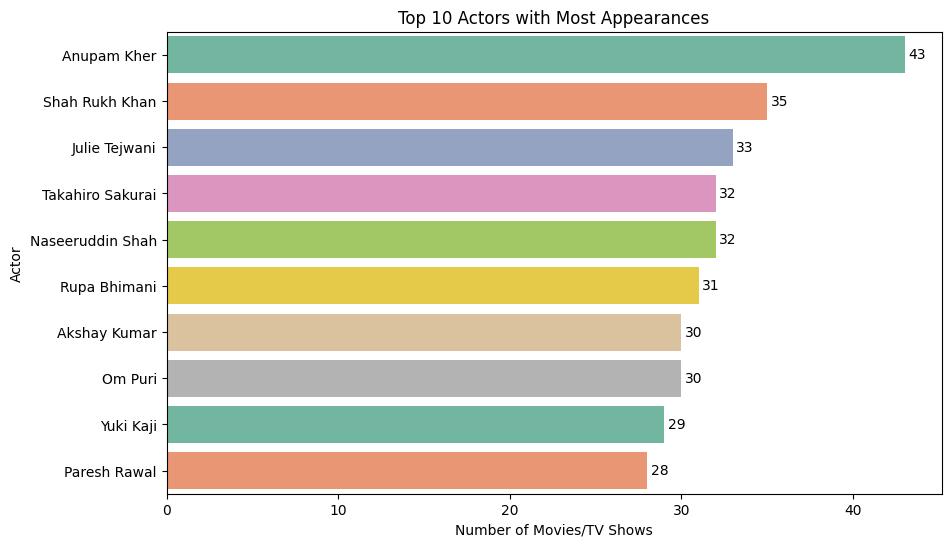

In [127]:
# Creating a plot for the top 10 actors
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_actors.values , y=top_10_actors.index, palette=custom_palette)
plt.title('Top 10 Actors with Most Appearances')
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Actor')

#Adding number labels to the bars
for i, v in enumerate(top_10_actors.values):
  plt.text(v + 0.2, i, str(v), color='black', va='center')
plt.show()

---

**Insights:**

1. **Prolific Presence of Anupam Kher:**
   - Anupam Kher's remarkable 43 appearances underscore his enduring presence in the entertainment industry.
   - His consistent contribution to various projects suggests reliability and versatility.

2. **Widespread Popularity of Shah Rukh Khan:**
   - With 35 appearances, Shah Rukh Khan stands as a household name.
   - His extensive body of work reflects not only talent but also a strong appeal to a broad audience.

3. **Global Diversity in Cast:**
   - The inclusion of renowned Japanese voice actors, Takahiro Sakurai and Yuki Kaji, adds diversity.
   - Their presence showcases Netflix's commitment to a global audience.

4. **Balanced Mix of Veteran and Newer Talents:**
   - Naseeruddin Shah and Amitabh Bachchan, seasoned actors, coexist with newer talents.
   - This blend promises a dynamic range of performances across genres.
---
**Recommendations**:

1. **Collaboration with Influential Actors:**
   - Leverage Anupam Kher and Shah Rukh Khan's fanbases.
   - Collaborate on projects to enhance visibility and engagement.

2. **Exploration of Global Content:**
   - Capitalize on Takahiro Sakurai and Yuki Kaji's popularity.
   - Create diverse content that resonates internationally.

3. **Leverage Veteran Talent for Quality Content:**
   - Naseeruddin Shah and Amitabh Bachchan bring depth.
   - Involve them in critically acclaimed productions.

In summary, Netflix can strategically harness this mix of established and diverse talents to captivate a broad viewer base. 🌟🎬

---



**B.** Identify the top 10 directors who have appeared in most movies or TV shows.

In [128]:
# Stripping any leading/trailing whitespace from the director names
unnested_director['director'] = unnested_director['director'].str.strip()

# Remove 'unknown_Director' since it's not a real director
f_cleaned = unnested_director[unnested_director['director']!= 'unknown_Director']

# Group the DataFrame by 'director' and count the number of shows
top_directors = f_cleaned.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)
print("Top 10 directors who have appeared in most movies or TV shows:")
top_directors

Top 10 directors who have appeared in most movies or TV shows:


director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Jay Chapman            12
Martin Scorsese        12
Name: title, dtype: int64

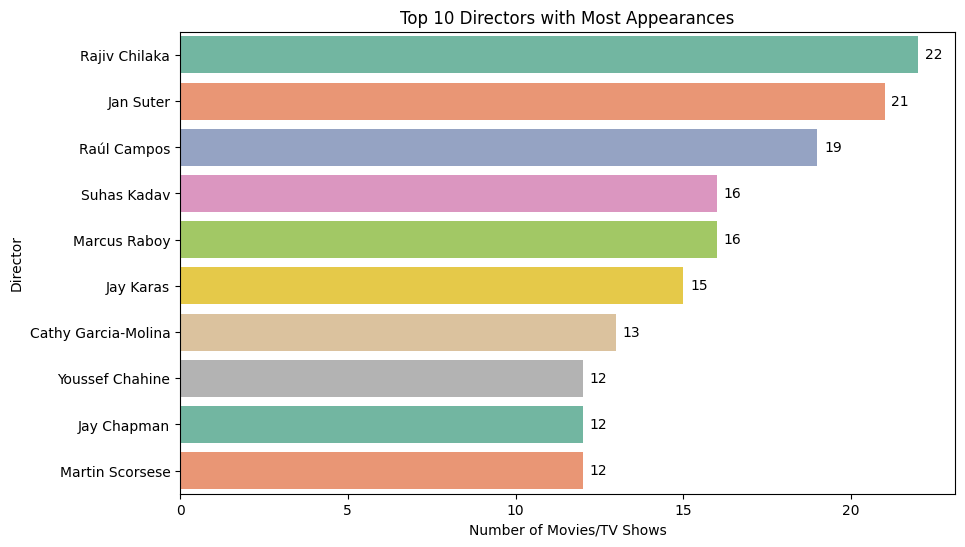

In [129]:
# Creating a plot for the top 10 directors
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values , y=top_directors.index, palette=custom_palette)
plt.title('Top 10 Directors with Most Appearances')
plt.xlabel('Number of Movies/TV Shows')
plt.ylabel('Director')

#Adding number labels to the bars
for i, v in enumerate(top_directors.values):
  plt.text(v + 0.2, i, str(v), color='black', va='center')
plt.show()

---
**Insights:**

1. **Collaboration and Expansion:**
   - Continuing partnerships with prolific directors like Rajiv Chilaka, Jan Suter, and Raúl Campos is essential.
   - Their contributions can help maintain a diverse and extensive content library that appeals to a wide audience.

2. **Supporting Emerging Talent:**
   - Directors like Suhas Kadav and Marcus Raboy represent fresh voices in the industry.
   - Netflix should actively nurture and collaborate with emerging talent to foster creativity and innovation.

3. **Quality Content with Established Directors:**
   - Martin Scorsese's involvement brings credibility and excellence.
   - Leveraging his expertise can lead to high-quality, critically acclaimed productions.

4. **Exploring Regional Content:**
   - Directors such as Cathy Garcia-Molina and Youssef Chahine offer unique perspectives.
   - Investing in regional content can attract diverse audiences globally.


---
**Recommendations:**
1. **Collaboration and Diversity:**
   - Foster collaborations between established and emerging directors.
   - Aim for a diverse range of genres and cultural perspectives.

2. **Quality Over Quantity:**
   - Prioritize impactful projects over sheer volume.
   - Ensure each production aligns with Netflix's vision.

3. **Regional and Global Content:**
   - Leverage international directors for regional and global appeal.
   - Explore untapped markets and unique storytelling.

---
By implementing these recommendations, Netflix can continue to captivate audiences worldwide with compelling content. Netflix's commitment to collaboration, quality, and diversity will undoubtedly shape its future success. 🌟🎥

**5.** Which genre movies are more popular or produced more

In [130]:
# Filtering Movies data
movies_data = df[df['type'] == 'Movie']

# Filtering the dataset for movies
movies_genre_data = unnest_dataframe(movies_data, 'listed_in')

# Stripping any leading/trailing whitespace from the genre names
movies_genre_data['listed_in'] = movies_genre_data['listed_in'].str.strip()

# Count the occurrences of each top 10 genre
top_genre_counts = movies_genre_data['listed_in'].value_counts().sort_values(ascending=False).head(10)
print("Top 10 Movie Genres:")
top_genre_counts

Top 10 Movie Genres:


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: count, dtype: int64

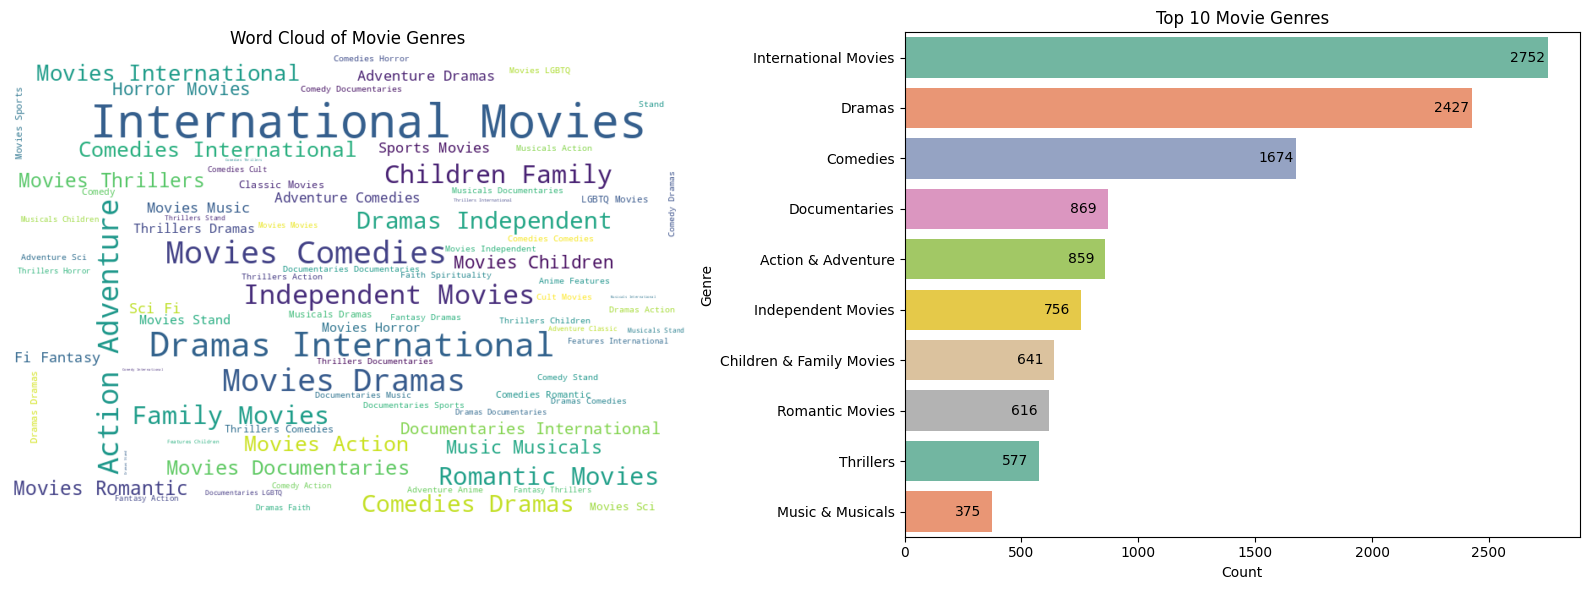

In [131]:
from wordcloud import WordCloud, STOPWORDS

# Create subplots
plt.figure(figsize=(16, 6))

# Word cloud
plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=800, height=550, background_color='white').generate(' '.join([str(x) for x in movies_genre_data['listed_in']]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Genres')

# Bar plot
plt.subplot(1, 2, 2)
sns.barplot(x=top_genre_counts.values, y=top_genre_counts.index, palette=custom_palette)
plt.title('Top 10 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

#Adding number labels to the bars
for i, v in enumerate(top_genre_counts.values):
  plt.text(v -160, i, str(v), color='black', va='center')

#Display
plt.tight_layout()
plt.show()

---
**Insights:**

1. **Most Produced Genres:**
   - The genres with the highest production counts are International Movies, Dramas, and Comedies.
   - These genres have a significant presence in Netflix's content library.

2. **Diverse Genre Landscape:**
   - The list includes genres like Documentaries, Action & Adventure, Independent Movies, and more.
   - Netflix caters to a wide range of viewer preferences.
---
**Recommendations:**

1. **Content Acquisition and Creation:**
   - Invest in acquiring or producing more content within the most popular genres.
   - This strategy can attract a larger audience and enhance user engagement.

2. **Content Curation:**
   - Curate and highlight movies from diverse genres.
   - Cater to a broader audience with varying preferences.

3. **User Recommendations:**
   - Leverage user data and viewing history.
   - Provide personalized recommendations for movies in genres that align with individual preferences.

4. **Genre-Specific Promotions:**
   - Run targeted promotions or campaigns.
   - Highlight movies from less explored genres to help users discover new content.

5. **User Surveys:**
   - Conduct user surveys or gather feedback.
   - Understand viewer preferences and identify gaps in content offerings.

6. **Dynamic Content Library:**
   - Regularly update and refresh the content library.
   - Keep it dynamic and aligned with evolving viewer tastes.

By implementing these recommendations, Netflix can continue to engage its diverse audience with a rich variety of content. 🎥🌟

---

#**6. Find After how many days the movie will be added to Netflix after the release of the movie.**

The most frequent number of days between movie release and addition to Netflix is: 334 days
The average number of days between movie release and addition to Netflix is: 2273.14 days


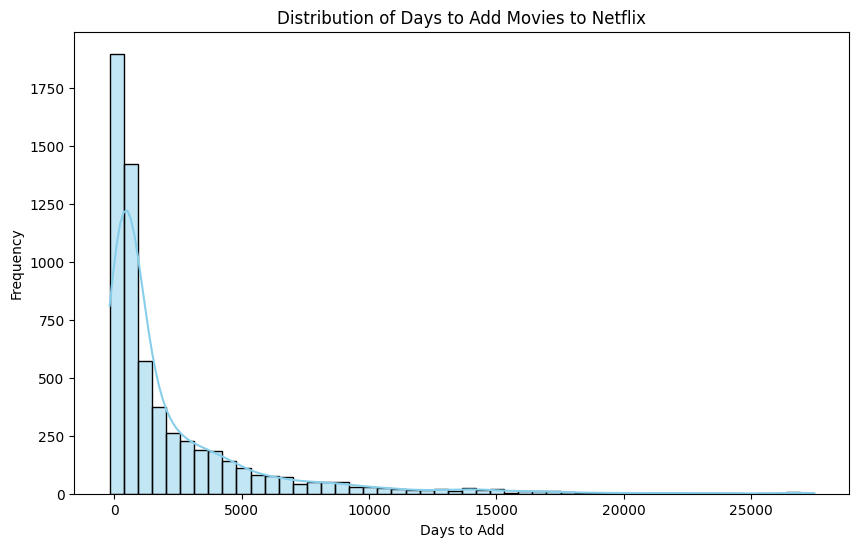

In [132]:
# Convert 'date_added' and 'release_year' to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Calculate the difference between 'date_added' and 'release_year' in days
df['days_to_add'] = (df['date_added'] - df['release_year']).dt.days

# Filter for movies and calculate the mode of 'days_to_add'
movies_df = df[df['type'] == 'Movie']
mode_days_to_add = movies_df['days_to_add'].mode()[0]
print(f"The most frequent number of days between movie release and addition to Netflix is: {mode_days_to_add} days")

# Calculate the average number of days between movie release and addition to Netflix
average_days_to_add = movies_df['days_to_add'].mean()
print(f"The average number of days between movie release and addition to Netflix is: {average_days_to_add:.2f} days")

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['days_to_add'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Days to Add Movies to Netflix')
plt.xlabel('Days to Add')
plt.ylabel('Frequency')
plt.show()

---
**Insights:**

1. **Duration Between Release and Netflix Addition:**
   - The most frequent duration between movie release and addition to Netflix is approximately 334 days.
   - However, the average duration is significantly longer at 2273.14 days.
   - This suggests that while the average acquisition time is lengthy, specific time periods (such as the mode of 334 days) are more prevalent.
---
**Recommendations:**

1. **Strategic Content Acquisition:**
   - Consider acquiring content closer to the mode (around 334 days) to align with viewer preferences.
   - Focus on timely additions to keep the content library fresh.

2. **Release Timing and Promotion:**
   - Plan releases strategically, especially during holidays and peak viewing seasons.
   - Promote newly added content to maximize engagement.
---




> "Netflix isn’t just a streaming service; it’s a global entertainment phenomenon.” 🌎🎥

---
**Overall Insights:**
1. **Content Distribution by Country:**
   - The United States, India, and the United Kingdom lead in Netflix movie production.
   - For TV shows, the top producers are the US, UK, and Japan.
   - India produces fewer TV shows compared to movies.

2. **Content Localization and Collaboration:**
   - Explore opportunities for content localization in top countries.
   - Strengthen collaborations with content creators from these regions.

3. **Optimal Release Timing:**
   - Ideal TV show launch times are around Week 27 (July) and December.
   - Best movie release times are Week 1 (January) and July.

4. **Talented Cast Diversity:**
   - Anupam Kher and Shah Rukh Khan have substantial presence.
   - Japanese voice actors Takahiro Sakurai and Yuki Kaji add global diversity.
   - A mix of veteran and newer talents promises dynamic performances.

5. **Genre Insights:**
   - Most produced genres include International Movies, Dramas, and Comedies.
   - Netflix caters to diverse genres like Documentaries and Action & Adventure.

6. **Content Acquisition Duration:**
   - The mode duration between movie release and Netflix addition is around 334 days.
   - Strategic acquisition closer to this mode is recommended.
---
**Overall Recommendations**:
1. **Strategic Content Planning:**
   - Align content releases with peak months and viewer preferences.
   - Promote content during these times for maximum impact.

2. **Global Content Strategy:**
   - Leverage diverse talents for collaborations.
   - Create region-specific content and explore international genres.

3. **User-Centric Approach:**
   - Personalize recommendations based on user preferences.
   - Conduct surveys to understand viewer needs.
---
**Simplified Summary:**

Netflix's popular content includes adult-rated shows and movies. Strategic release timing during holidays and summer is effective. Viewers love dramas, comedies, crime, action, and adventure genres. Indian actors dominate movies, while Japanese actors excel in TV shows on Netflix.

Netflix’s global success lies in its strategic content planning, diverse talent collaborations, and user-centric approach. By aligning releases with peak months, curating diverse genres, and leveraging influential actors, Netflix continues to captivate audiences worldwide. 🌟🎬


---

